### Ibad Ur Rahman
### 23MDBCS421
### Data Science
### Semester 5th
### Lab Task 7
### Dr.Tariq Sadad

In [1]:
import warnings
warnings.filterwarnings('ignore')

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Your Dataset

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.rename(columns={'Genre':'Gender'})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
feature = df.drop(columns='CustomerID')

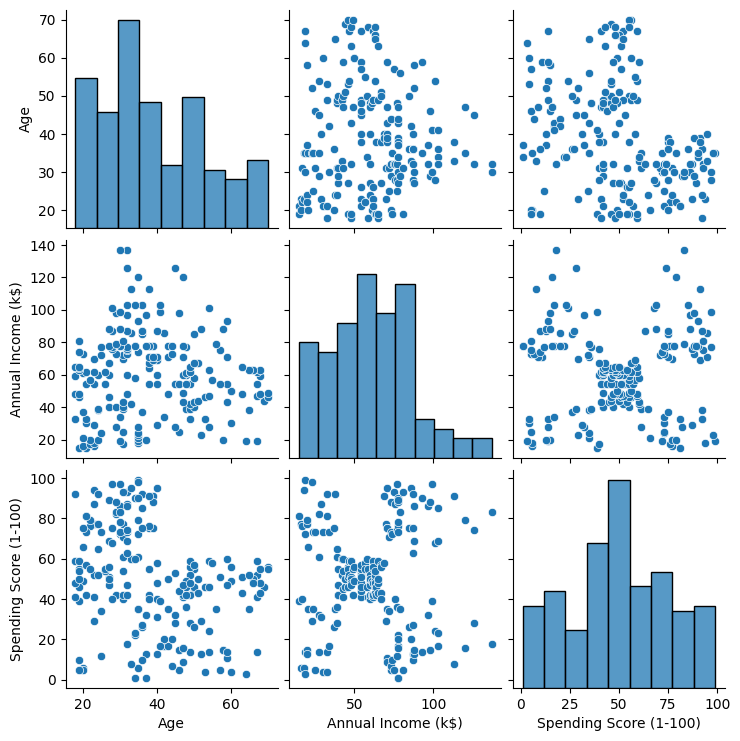

In [9]:
sns.pairplot(feature,kind="scatter")

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Turn non-numeric feature into number
# Male=0, Female=1
feature.loc[feature['Gender']=='Male','Gender']=0
feature.loc[feature['Gender']=='Female','Gender']=1

In [12]:
from sklearn.metrics import silhouette_score

Find the Best  K using Silhouette Score

In [13]:
silhouette_scores = []

for k in range(2, 11):  # silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(feature)
    score = silhouette_score(feature, labels)
    silhouette_scores.append(score)
    print(f"For k = {k}, Silhouette Score = {score}")


For k = 2, Silhouette Score = 0.3318732932946229
For k = 3, Silhouette Score = 0.33545193002465656
For k = 4, Silhouette Score = 0.4052954330641215
For k = 5, Silhouette Score = 0.3574050351346702
For k = 6, Silhouette Score = 0.41532495778518114
For k = 7, Silhouette Score = 0.44172063782131477
For k = 8, Silhouette Score = 0.43249096868827536
For k = 9, Silhouette Score = 0.40888277359609176
For k = 10, Silhouette Score = 0.39641637496481097


Plot Silhouette Scores

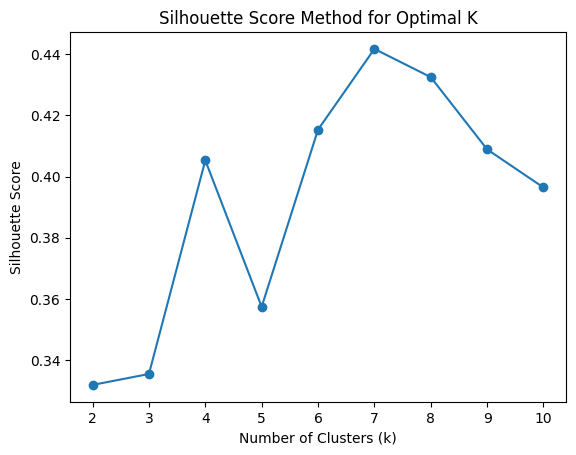

In [14]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


3-Cluster Bar Chart (Each with a Unique Color)

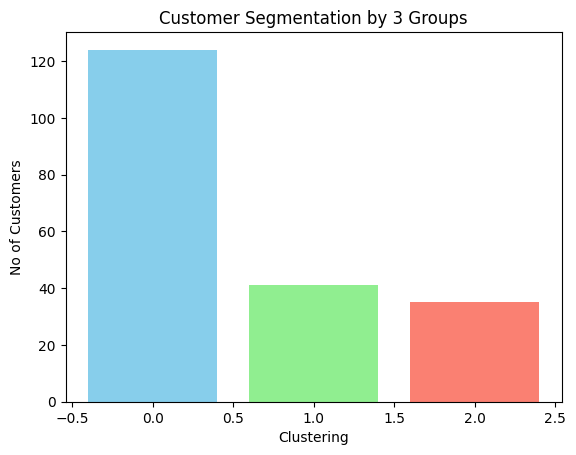

In [20]:
km = KMeans(n_clusters=3, random_state=42).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)

# assign different colors to each cluster bar
colors = ['skyblue', 'lightgreen', 'salmon']

plt.bar(n_cluster, km_count, color=colors)
plt.ylabel('No of Customers')
plt.xlabel('Clustering')
plt.title('Customer Segmentation by 3 Groups')
plt.show()


3-Cluster Scatter Plot (Custom Colors + Legend)

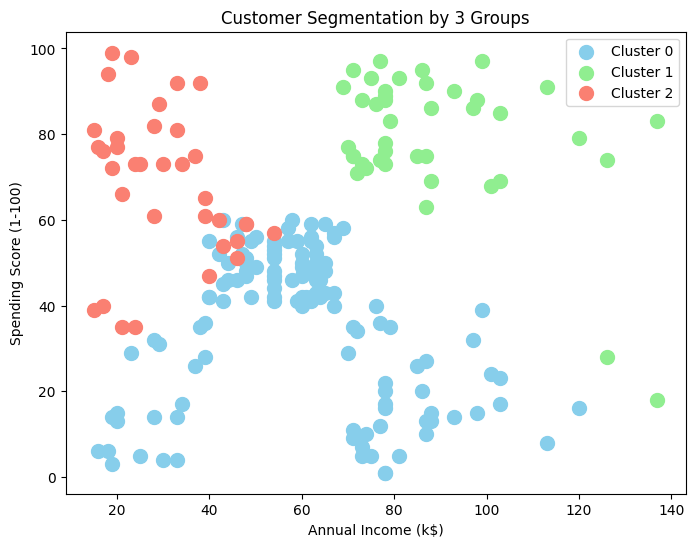

In [21]:
plt.figure(figsize=(8,6))

# Define fixed colors for each cluster
colors = ['skyblue', 'lightgreen', 'salmon']

for i in range(3):
    plt.scatter(df[y_km == i]['Annual Income (k$)'],
                df[y_km == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation by 3 Groups')
plt.legend()
plt.show()


5-Cluster Bar Chart (Each with a Unique Color)

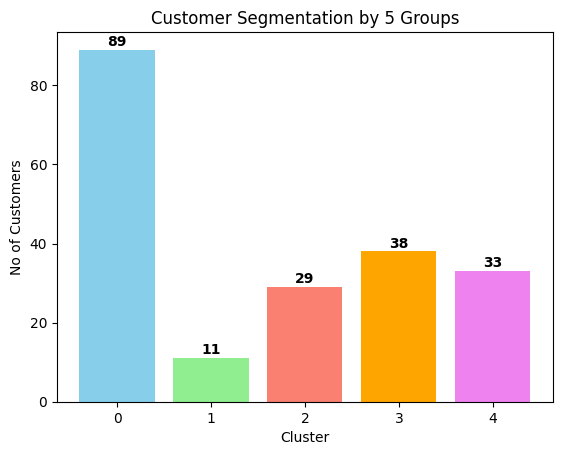

In [22]:
km = KMeans(n_clusters=5, random_state=42).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)

# define 5 different colors for 5 clusters
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet']

plt.bar(n_cluster, km_count, color=colors)
plt.ylabel('No of Customers')
plt.xlabel('Cluster')
plt.title('Customer Segmentation by 5 Groups')

# optional: add count labels on top of bars
for i, count in enumerate(km_count):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10, fontweight='bold')

plt.show()


5-Cluster Scatter Plot (Custom Colors + Legend)

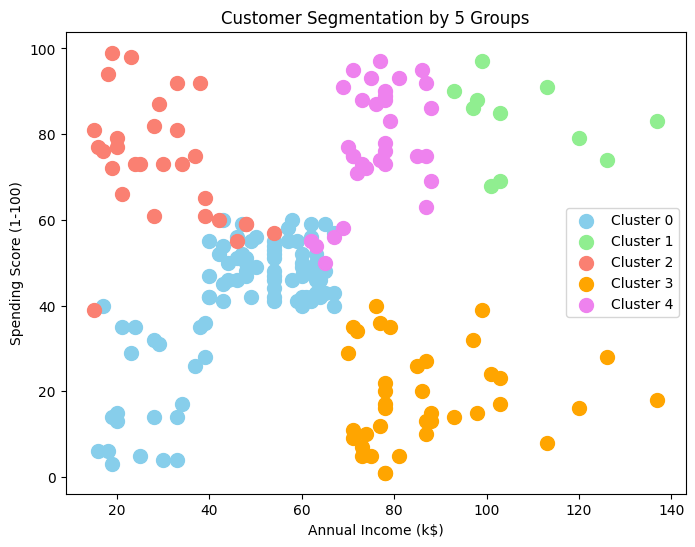

In [23]:
plt.figure(figsize=(8,6))

# define 5 distinct colors for the 5 clusters
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet']

# plot each cluster with a different color
for i in range(5):
    plt.scatter(df[y_km == i]['Annual Income (k$)'],
                df[y_km == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation by 5 Groups')
plt.legend()
plt.show()
